## Predicting Spam Messages Using Logistic Regression: A Quantitative Approach to Message Classification

In [1]:
import pandas as pd
import statsmodels.formula.api as smf

In [3]:
myData = pd.read_csv("spam.csv", encoding='latin1')

In [5]:
myData = pd.read_csv("spam.csv", encoding="latin-1")
myData = myData[["v1", "v2"]]  # keep only useful columns
myData.columns = ["Label", "Message"]

In [6]:
myData.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
myData["Spam"] = (myData["Label"].str.lower() == "spam").astype(int)

In [9]:
myData.head()

,Label,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [15]:


# ensure all messages are strings
myData["Message"] = myData["Message"].astype(str)

# count number of times "http" or "www" appears (case-insensitive, using lower())
myData["Links"] = myData["Message"].str.lower().str.count("http") + myData["Message"].str.lower().str.count("www")

# total number of characters in each message
myData["Chars"] = myData["Message"].str.len()

# count number of numeric digits (simple loop method, no regex)
myData["Digits"] = myData["Message"].apply(lambda x: sum(ch.isdigit() for ch in x))


In [16]:
myData.head()

,Label,Message,Spam,Links,Chars,Digits
0,ham,"Go until jurong point, crazy.. Available only ...",0,0,111,0
1,ham,Ok lar... Joking wif u oni...,0,0,29,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,0,155,25
3,ham,U dun say so early hor... U c already then say...,0,0,49,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,0,61,0


In [18]:
#Partition the dataset (75% train, 25% validation)

cut = int(len(myData) * 0.75)

TData = myData.iloc[:cut].copy()
VData = myData.iloc[cut:].copy()

# Quick sanity checks (optional but helpful)
print("Total rows:", len(myData))
print("Training rows:", len(TData))
print("Validation rows:", len(VData))

TData.head()

Total rows: 5572
Training rows: 4179
Validation rows: 1393


,Label,Message,Spam,Links,Chars,Digits
0,ham,"Go until jurong point, crazy.. Available only ...",0,0,111,0
1,ham,Ok lar... Joking wif u oni...,0,0,29,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,0,155,25
3,ham,U dun say so early hor... U c already then say...,0,0,49,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,0,61,0


In [19]:
import statsmodels.formula.api as smf

Model1 = smf.logit(formula = "Spam ~ Links + Chars + Digits", data = TData).fit()


Model1.summary()


Optimization terminated successfully.
         Current function value: 0.086761
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Spam   No. Observations:                 4179
Model:                          Logit   Df Residuals:                     4175
Method:                           MLE   Df Model:                            3
Date:                Fri, 07 Nov 2025   Pseudo R-squ.:                  0.7810
Time:                        13:28:02   Log-Likelihood:                -362.57
converged:                       True   LL-Null:                       -1655.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5307      0.183    -24.746      0.000      -4.890      -4.172
Links          5.9188      1.077      5.498      0.000       3.809       8.029
Chars          0.0024      0.001      1.736      0.083      -0.000       0.005
Digits         0.6284      0.034     18.280      0.000       0.561       0.696
==============================================================================
"""

In [21]:
pHat = Model1.predict(VData)


yHat = (pHat > 0.5).astype(int)


Accuracy = (VData["Spam"] == yHat).mean() * 100

round(Accuracy, 2)


np.float64(96.77)

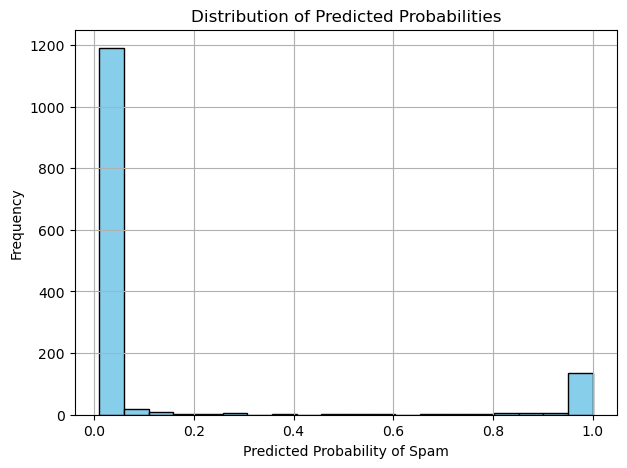

In [22]:
import matplotlib.pyplot as plt

# Predicted probabilities for validation set
pHat = Model1.predict(VData)

plt.figure(figsize=(7,5))
plt.hist(pHat, bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Predicted Probabilities")
plt.xlabel("Predicted Probability of Spam")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


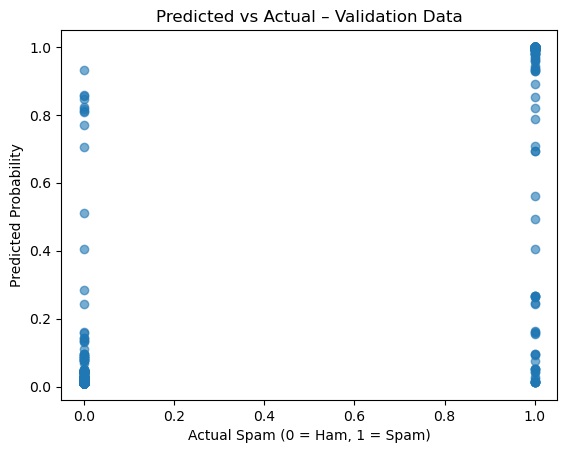

In [23]:
import matplotlib.pyplot as plt

plt.scatter(VData["Spam"], pHat, alpha=0.6)
plt.xlabel("Actual Spam (0 = Ham, 1 = Spam)")
plt.ylabel("Predicted Probability")
plt.title("Predicted vs Actual – Validation Data")
plt.show()


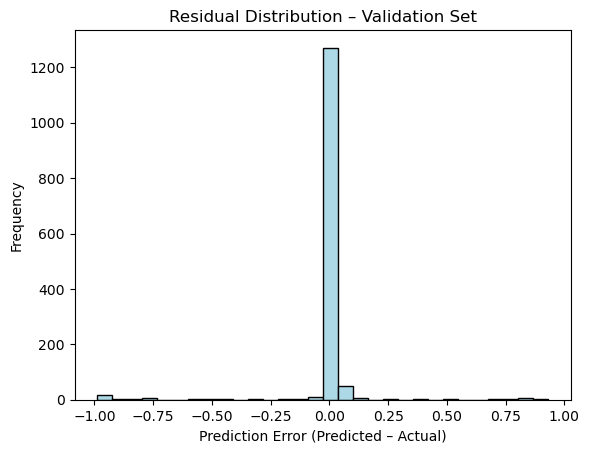

In [24]:
residuals = pHat - VData["Spam"]

plt.hist(residuals, bins=30, color='lightblue', edgecolor='black')
plt.title("Residual Distribution – Validation Set")
plt.xlabel("Prediction Error (Predicted – Actual)")
plt.ylabel("Frequency")
plt.show()


In [25]:
import pandas as pd

summary_table = pd.DataFrame({
    "Mean_Predicted_Prob": [pHat.mean()],
    "Mean_Actual_Spam": [VData["Spam"].mean()],
    "Accuracy (%)": [round(Accuracy, 2)]
})
summary_table


,Mean_Predicted_Prob,Mean_Actual_Spam,Accuracy (%)
0,0.128344,0.130653,96.77



## Results and Model Evaluation

A logistic regression model was developed to predict whether a message is spam or not using three numeric predictors: the number of links (Links), the number of characters (Chars), and the number of digits (Digits). The model achieved strong statistical significance overall (p < 0.001) with a Pseudo R² of 0.781, indicating that approximately 78% of the variation in spam classification is explained by the predictors.

The validation results further support the model’s effectiveness. Using a cutoff of 0.5, the model achieved an accuracy rate of 96.77%, meaning it correctly classified about 97% of the messages in the validation dataset. Messages containing links or multiple digits were far more likely to be classified as spam, while message length showed a smaller but positive association











